In [1]:
from qiskit import QuantumCircuit , transpile, Aer, assemble
from qiskit.visualization import plot_histogram

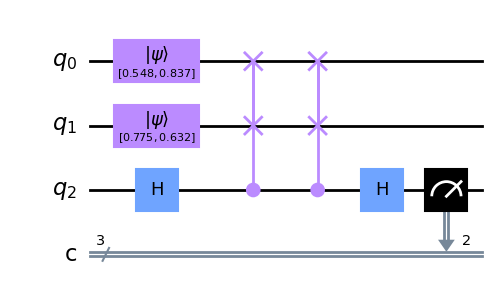

In [2]:
from qiskit.extensions import Initialize
from math import sqrt

# Prepare the the two Quantum States that we wish to compare
state_psi  = [sqrt(0.3),sqrt(0.7)]
state_phi = [sqrt(0.6),sqrt(0.4)]

# Prepare 3 Qubit Quantum Circuit
qc = QuantumCircuit(3,3)

# Given list of complex amplitudes for the qubit to be initialised to
Initialize_psi = Initialize(state_psi)
Initialize_phi = Initialize(state_phi)

# Assign the Quanutum State psi to the first Qubit and phi to the second qubit
qc.append(Initialize_psi,[0])
qc.append(Initialize_phi,[1])

# Create an anciliarry Qubit
qc.h(2)

# Controlled Swap Gate where control is on 2 and targets are 0,1
qc.cswap(2,0,1)

# Controlled Swap Gate where control is on 2 and targets are 1,0
qc.cswap(2,1,0)

# Hadamard gate on the ancillary qubit
qc.h(2)

# Measure the ancillary qubit
qc.measure(2,2)

qc.draw('mpl')

In [22]:
from qiskit_aer.noise import (NoiseModel, depolarizing_error)
from qiskit import Aer
import matplotlib.pyplot as plt

# Simulate the circuit with varying error rates
err_rt = [0.1, 0.2, 0.3, 0.4, 0.5]
count_list = []

for p in err_rt:
    # Define the error rate 

    # Create a depolarizing error for each gate in the circuit
    error_1 = depolarizing_error(p,1)
    error_3 = depolarizing_error(p,3)

    # Create a noise model and add the error to the gates
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['h'])
    noise_model.add_all_qubit_quantum_error(error_3,['cswap'])

    simulator = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, simulator)

    # Simulate the noisy circuit
    noisy_result = simulator.run(transpiled_qc, noise_model=noise_model, shots=8192).result()

    # Plot the histogram of measurement results
    counts = noisy_result.get_counts()
    count_list.append(counts)

plot_histogram(count_list)
print(count_list)


[{'100': 1445, '000': 6747}, {'000': 5758, '100': 2434}, {'100': 3135, '000': 5057}, {'100': 3580, '000': 4612}, {'100': 3870, '000': 4322}]
